In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Descargar set de datos de entrenamiento Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised = True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteORV1Z9/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteORV1Z9/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [ ]:
# Separar entrenamiento de pruebas
datos_entrenamiento, datos_prueba = datos['train'], datos['test']

In [ ]:
# Nombres de los datos
nombres_clases=metadatos.features['label'].names

In [ ]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Función de normalizacion (0-255) -> (0-1)
# Hace que la red neuronal aprenda mejor y mas rapido
def normalizar (imagenes, etiquetas):
  imagenes=tf.cast(imagenes, tf.float32)
  imagenes /= 255 #lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

# Haciendo que la funcion trabaje
datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_prueba=datos_prueba.map(normalizar)

# Subiendo a la cache
datos_entrenamiento=datos_entrenamiento.cache()
datos_prueba=datos_prueba.cache()

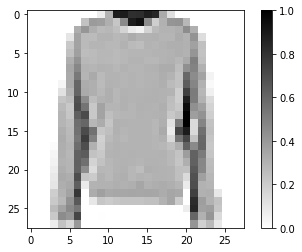

In [ ]:
# Mostrar una imagen
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) # Redimensionamiento de la imagen
import matplotlib.pyplot as plt

# Mostrar la imagen
plt.figure()
plt.imshow(imagen,cmap=plt.cm.binary) 
plt.colorbar()
plt.grid(False)
plt.show()

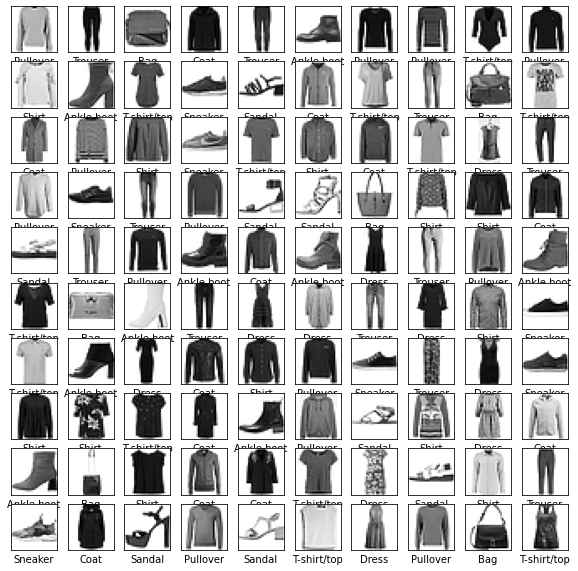

In [ ]:
# Dibujar un grupo
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(100)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
# Creando el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) # Redes de clasificacion
])

In [ ]:
from tensorflow.python.training.saver import metrics
# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# 60 mil y 10 mil
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [ ]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [ ]:
# Definiendo tamaño de lote de entrenamiento
tamaño_lote=64

datos_entrenamiento=datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(tamaño_lote)
datos_prueba=datos_prueba.batch(tamaño_lote)

In [ ]:
import math
historial=modelo.fit(datos_entrenamiento,epochs=10,steps_per_epoch=math.ceil(num_ej_entrenamiento/tamaño_lote))

Epoch 1/10
938/938 [==============================] - 12s 3ms/step - loss: 0.5491 - accuracy: 0.8099
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3989 - accuracy: 0.8566
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3598 - accuracy: 0.8685
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3390 - accuracy: 0.8760
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3166 - accuracy: 0.8834
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3053 - accuracy: 0.8878
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2965 - accuracy: 0.8908
Epoch 8/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2854 - accuracy: 0.8952
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2776 - accuracy: 0.8968
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2683 - accuracy: 0.899

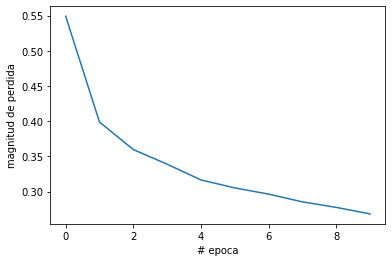

In [ ]:
# Ver la función
plt.xlabel('# epoca')
plt.ylabel('magnitud de perdida')
plt.plot(historial.history['loss'])

In [ ]:
# Probar el automata
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiquetas_prueba=etiquetas_prueba.numpy()
  predicciones=modelo.predict(imagenes_prueba)

2/2 [==============================] - 0s 6ms/step


In [ ]:
imagen = imagenes_prueba[1]
imagen=np.array([imagen])
prediccion=modelo.predict(imagen)
print('Predicion: '+nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 108ms/step
Predicion: Coat
